In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import json


def jsonToDf(reg):
    with open('archive/'+reg+'_category_id.json','r') as f:
        j_data = json.load(f)
        id = []
        title =[]
        for i in range (len(j_data['items'])):
            id.append(int(j_data['items'][i]['id']))
            title.append(j_data['items'][i]['snippet']['title'])
        
        tmp_ = pd.DataFrame({'category_id': id, 'category_name': title})
        
        file = "archive/"+reg+"videos.csv"
        
        df_ = pd.read_csv(file, encoding='latin')
        df_['region'] = reg
        df_  = pd.merge(df_, tmp_, on='category_id', how='left')
        
        del tmp_
        
    return df_

In [3]:
df_CA = jsonToDf('CA')
df_DE = jsonToDf('DE')
df_FR = jsonToDf('FR')
df_GB = jsonToDf('GB')
df_IN = jsonToDf('IN')
df_JP = jsonToDf('JP')
df_KR = jsonToDf('KR')
df_MX = jsonToDf('MX')
df_RU = jsonToDf('RU')
df_US = jsonToDf('US')

In [4]:
df = pd.concat([df_CA, df_DE, df_FR, df_GB, df_IN,
                df_JP, df_KR, df_MX, df_RU, df_US], ignore_index=True)

In [5]:
df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
region                        0
category_name              2738
dtype: int64

In [6]:
rows = df['region'].value_counts()
category_miss = df['category_name'].isnull().groupby(df['region']).sum()
(category_miss/rows)*100

CA    0.181013
DE    0.626836
FR    0.279933
GB    0.231267
IN    0.281109
JP    0.087706
KR    0.833165
MX    0.622976
RU    3.782616
US    0.000000
dtype: float64

In [7]:
df = df.dropna(subset=['category_name'])

In [8]:
df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19183
region                        0
category_name                 0
dtype: int64

In [9]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month
df['trend_interval_days'] = (df['trending_date'] - df['publish_time']).dt.days+1

df['comments_disabled'] = df['comments_disabled'].apply(lambda x: 0 if x == False else 1)
df['ratings_disabled'] = df['ratings_disabled'].apply(lambda x: 0 if x == False else 1)
df['video_error_or_removed'] = df['video_error_or_removed'].apply(lambda x: 0 if x == False else 1)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region,category_name,publish_year,publish_month,trend_interval_days
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,0,0,0,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,2017,11,4
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,0,0,0,STill got a lot of packages. Probably will las...,CA,Comedy,2017,11,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0,0,0,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,2017,11,2
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,0,0,0,I know it's been a while since we did this sho...,CA,Entertainment,2017,11,2
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,0,0,0,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,2017,11,5


Analise de duplicidades

In [131]:
tst = df.groupby(["video_id","title","channel_title","region","category_id", "category_name", "publish_year", "publish_month"])\
                                 .agg({"trending_date": [np.max, np.min, np.size], \
                                  "trend_interval_days": [np.max, np.min, np.mean], \
                                  "views": np.max, \
                                  "dislikes": np.max, \
                                  "comment_count": np.max,\
                                  "likes": np.max, \
                                  "comments_disabled": np.max, \
                                  "ratings_disabled": np.max, \
                                  "video_error_or_removed": np.max})
# tst = tst.rename(columns={'trending_date[amax]': 'tete'})
# tst.columns
# tst.columns = tst.columns.to_flat_index()
tst = tst.reset_index()
tst.columns

MultiIndex([(              'video_id',     ''),
            (                 'title',     ''),
            (         'channel_title',     ''),
            (                'region',     ''),
            (           'category_id',     ''),
            (         'category_name',     ''),
            (          'publish_year',     ''),
            (         'publish_month',     ''),
            (         'trending_date', 'amax'),
            (         'trending_date', 'amin'),
            (         'trending_date', 'size'),
            (   'trend_interval_days', 'amax'),
            (   'trend_interval_days', 'amin'),
            (   'trend_interval_days', 'mean'),
            (                 'views', 'amax'),
            (              'dislikes', 'amax'),
            (         'comment_count', 'amax'),
            (                 'likes', 'amax'),
            (     'comments_disabled', 'amax'),
            (      'ratings_disabled', 'amax'),
            ('video_error_or_removed', '

In [132]:
tst['max_trending_date'] = tst['trending_date']['amax']
tst['min_trending_date'] = tst['trending_date']['amin']
tst['trending_count'] = tst['trending_date']['size']
tst['max_trend_interval_days'] = tst['trend_interval_days']['amax']
tst['min_trend_interval_days'] = tst['trend_interval_days']['amin']
tst['mean_trend_interval_days'] = tst['trend_interval_days']['mean']
tst['views'] = tst['views']['amax']
tst['dislikes'] = tst['dislikes']['amax']
tst['comment_count'] = tst['comment_count']['amax']
tst['likes'] = tst['likes']['amax']
tst['comments_disabled'] = tst['comments_disabled']['amax']
tst['ratings_disabled'] = tst['ratings_disabled']['amax']
tst['video_error_or_removed'] = tst['video_error_or_removed']['amax']

tst = tst.droplevel(1, axis=1) 

tst.columns

# yourdf.drop(['columnheading1', 'columnheading2'], axis=1, inplace=True)

Index(['video_id', 'title', 'channel_title', 'region', 'category_id',
       'category_name', 'publish_year', 'publish_month', 'trending_date',
       'trending_date', 'trending_date', 'trend_interval_days',
       'trend_interval_days', 'trend_interval_days', 'views', 'dislikes',
       'comment_count', 'likes', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'max_trending_date', 'min_trending_date',
       'trending_count', 'max_trend_interval_days', 'min_trend_interval_days',
       'mean_trend_interval_days'],
      dtype='object')

In [133]:
tst.drop(['trending_date', 'trend_interval_days', ], axis=1, inplace=True)

In [134]:
tst.head()

,video_id,title,channel_title,region,category_id,category_name,publish_year,publish_month,views,dislikes,...,likes,comments_disabled,ratings_disabled,video_error_or_removed,max_trending_date,min_trending_date,trending_count,max_trend_interval_days,min_trend_interval_days,mean_trend_interval_days
0,#NAME?,#1ããã©ã¼ãå¼è ãLIMBOãã2BRO.ã,å è å¼è,JP,20,Gaming,2018,5,323474,134,...,2921,0,0,0,2018-05-30,2018-05-29,3,2,1,1.333333
1,#NAME?,#2 æªæ¥é ä¿¡ãï¼æªæ¥äººã¯ç´æã¯ãã...,Yuhi Riri Official,JP,24,Entertainment,2018,5,28869,28,...,1404,0,0,0,2018-05-29,2018-05-29,1,1,1,1.000000
2,#NAME?,"#4ãçæ¾éããã³ãã·ã£,ãºã¡ããã...",SANNINSHOW,JP,20,Gaming,2018,3,86005,37,...,1483,0,0,0,2018-03-08,2018-03-08,2,1,1,1.000000
3,#NAME?,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,IN,24,Entertainment,2018,6,1014376,1414,...,5974,0,0,0,2018-06-14,2018-06-13,4,2,1,1.500000
4,#NAME?,#MahaaNews Sensation: #MaheshKathi Leaves From...,Mahaa News,IN,25,News & Politics,2018,1,1912194,2492,...,23861,0,0,0,2018-01-12,2018-01-09,2,5,2,3.500000


In [135]:
tst.groupby(['publish_year']).sum().sort_values(by='trending_count', ascending=False)

,category_id,publish_month,views,dislikes,comment_count,likes,comments_disabled,ratings_disabled,video_error_or_removed,trending_count,max_trend_interval_days,min_trend_interval_days,mean_trend_interval_days
publish_year,,,,,,,,,,,,,
2018,3306517,519240,87460402269,143648599,319336476,2588394120,3904,3881,92,284103,309068,192825,249938.095272
2017,1006847,563421,23754778156,52552365,99962553,796308542,1023,830,13,88192,137688,98006,117810.519064
2015,817,364,5483872,2439,6160,38213,2,1,0,159,43192,43083,43137.500000
2016,1230,484,6827190,2650,4500,41232,1,1,0,151,31880,31785,31833.237374
2013,622,235,4910501,1088,2510,25430,0,0,0,127,55577,55484,55530.500000
2014,670,223,4934030,1602,8580,41630,1,0,0,121,49325,49240,49282.500000
2011,353,137,3352884,7347,5231,12848,0,0,0,117,49934,49835,49884.772727
2010,299,80,1786567,982,1233,10592,1,0,0,62,44512,44466,44489.000000
2008,123,53,1244660,225,1006,5325,0,0,0,59,31376,31326,31351.000000


[Text(0.5, 1.0, 'Comment Count')]

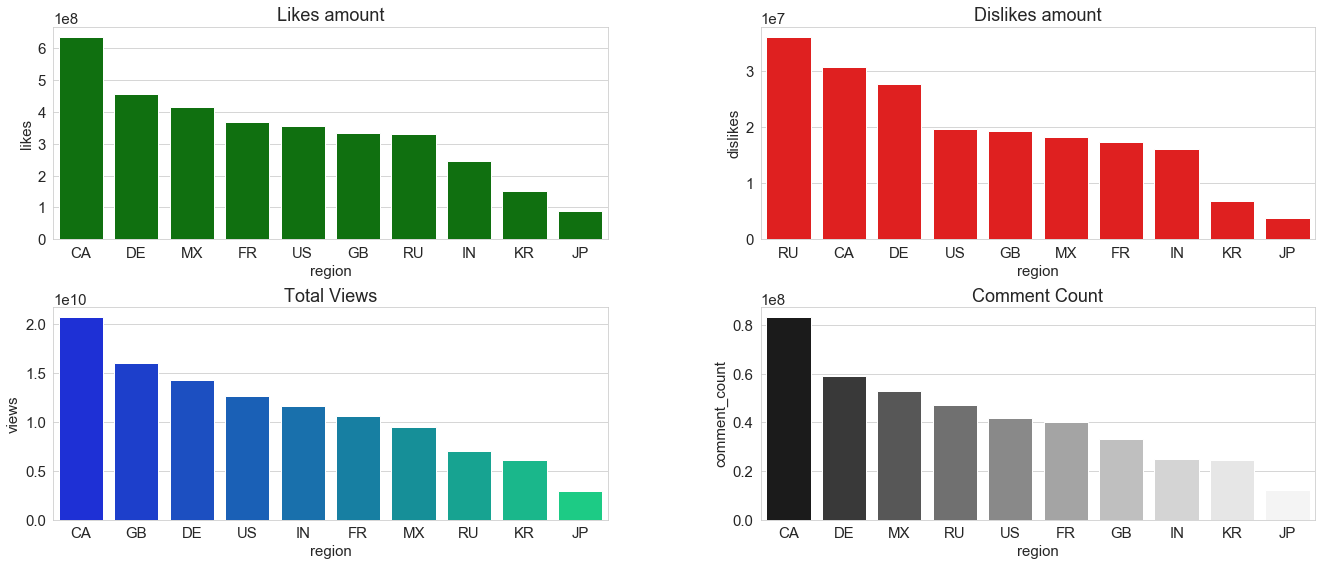

In [136]:
data = tst.groupby(['region']).sum().reset_index()

mpl.rc('font', size=15)
mpl.rc('axes', titlesize=18)

figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout(0.5)
figure.set_size_inches(20, 8)

sns.barplot(data=data.sort_values(by="likes", ascending=False), x="region", y="likes", color="green", ax=axes[0,0])
sns.barplot(data=data.sort_values(by="dislikes", ascending=False), x="region", y="dislikes", color="red", ax=axes[0,1])
sns.barplot(data=data.sort_values(by="views", ascending=False), x="region", y="views", palette='winter' ,ax=axes[1,0])
sns.barplot(data=data.sort_values(by="comment_count", ascending=False), x="region", y="comment_count", palette='Greys_r',ax=axes[1,1])

axes[0, 0].set(title='Likes amount')
axes[0, 1].set(title='Dislikes amount')
axes[1, 0].set(title='Total Views')
axes[1, 1].set(title='Comment Count')

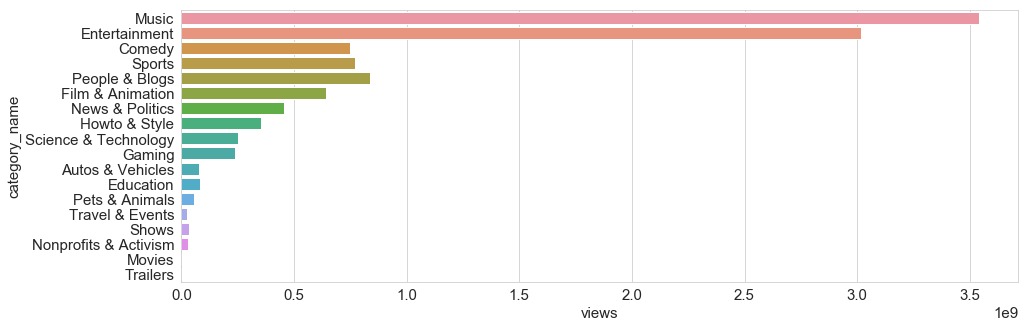

In [137]:
data = tst.groupby(['region','category_name']).sum().reset_index()
plt.figure(figsize=(15,5))
# sns.barplot(data=data[data['region']=='US'].sort_values(by=['views'], ascending=False), y='category_name', x='views', ci=None)
sns.barplot(data=data.sort_values(by=['views'], ascending=False), y='category_name', x='views', ci=None)

C:\Users\matcg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Count')

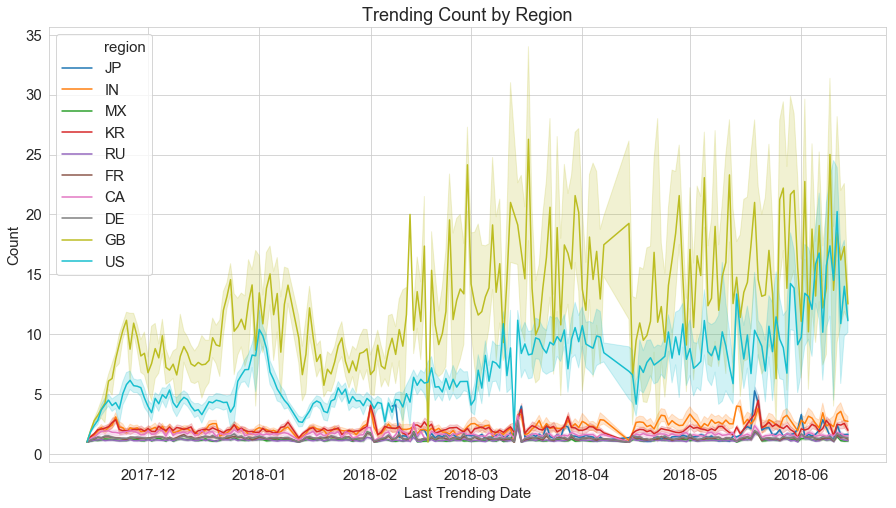

In [138]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.lineplot(data=tst,x="max_trending_date", y="trending_count", hue="region")
plt.title('Trending Count by Region')
plt.xlabel('Last Trending Date')
plt.ylabel('Count')

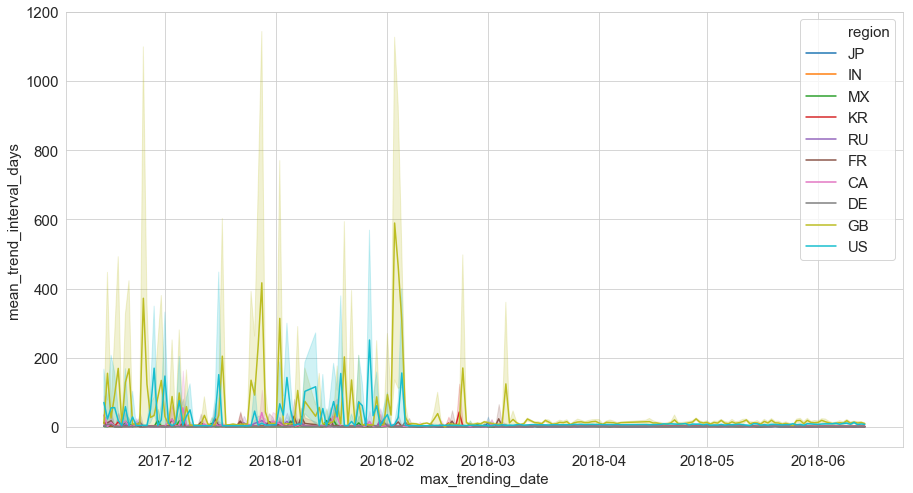

In [139]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.lineplot(data=tst,x="max_trending_date", y="mean_trend_interval_days", hue="region")
# plt.title('Trending Count by Region')
# plt.xlabel('Last Trending Date')
# plt.ylabel('Count')

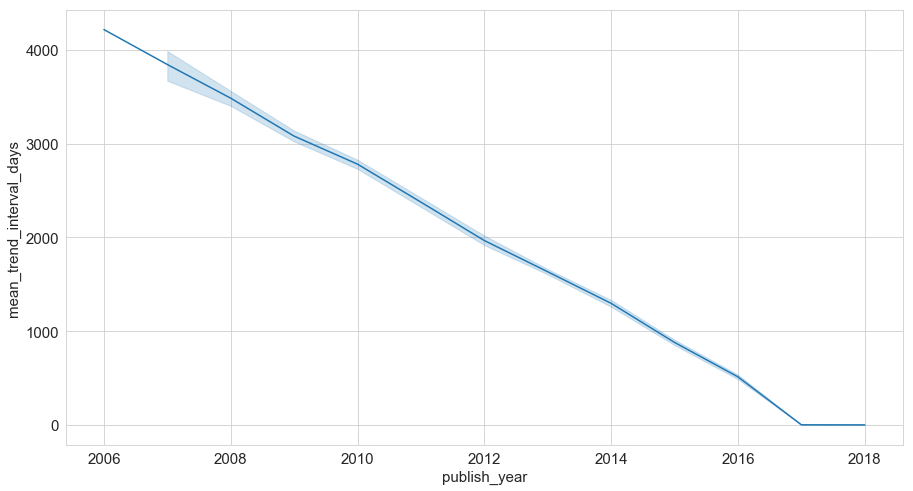

In [140]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.lineplot(data=tst,x="publish_year", y="mean_trend_interval_days")
# sns.lineplot(data=tst,x="publish_year", y="min_trend_interval_days")
# sns.lineplot(data=tst,x="publish_year", y="max_trend_interval_days")
# plt.title('Trending Count by Region')
# plt.xlabel('Last Trending Date')
# plt.ylabel('Count')

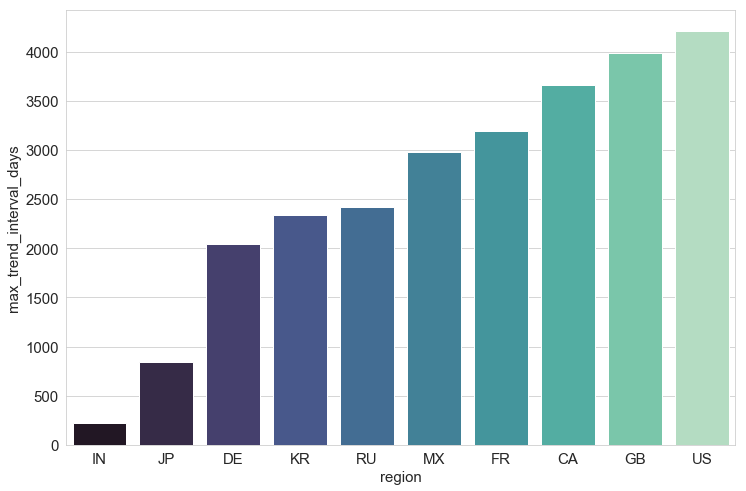

In [141]:
data = tst.groupby(['region']).max().reset_index().sort_values(by='max_trend_interval_days')
plt.figure(figsize=(12,8))
sns.barplot(x="region", y="max_trend_interval_days", palette="mako", data=data)

In [142]:
tst.iloc[tst.groupby(['region'])['max_trend_interval_days'].agg(pd.Series.idxmax)]

,video_id,title,channel_title,region,category_id,category_name,publish_year,publish_month,views,dislikes,...,likes,comments_disabled,ratings_disabled,video_error_or_removed,max_trending_date,min_trending_date,trending_count,max_trend_interval_days,min_trend_interval_days,mean_trend_interval_days
148548,hTSAyR3nOR0,Dolores O'riordan - her house in Canada,nenuostabu,CA,10,Music,2008,1,520808,51,...,1519,0,0,0,2018-01-18,2018-01-17,2,3658,3657,3657.5
53860,FXA937WRDk0,Kriminelle GroÃfamilien in Berlin - Interview...,GehirnerweichungNein,DE,25,News & Politics,2012,4,11373,1,...,90,0,0,0,2017-11-24,2017-11-24,1,2046,2046,2046.0
58895,H4Rq6xb9DnA,Mcfly et le Palmashow avec le rap des prÃ©noms,JemKei,FR,10,Music,2009,3,47365,10,...,513,0,0,0,2017-12-15,2017-12-15,1,3190,3190,3190.0
187471,tP_Dk81f9fg,Jeffrey Lewis The Legend of The Fall,Dav hum,GB,10,Music,2007,3,80828,2,...,340,0,0,0,2018-02-05,2018-01-28,9,3990,3982,3986.0
98329,T85l5uiBz1U,"Drunk and Drive Test to Anchor Pradeep, Ali & ...",Film City,IN,24,Entertainment,2017,5,58175,66,...,57,0,0,0,2018-01-03,2018-01-02,2,221,220,220.5
70424,Kci8Vd153Fw,ã«ã©ã¹ãç¬ã®å ãå£°ãçä¼¼ããã,power7577,JP,1,Film & Animation,2015,11,6965,0,...,56,0,0,0,2018-03-01,2018-03-01,2,844,844,844.0
123078,_j7LqDL6BMc,ìì±ì  - Goodbye,TeamKabeto,KR,10,Music,2011,9,82500,15,...,1029,0,0,0,2018-02-21,2018-02-19,3,2337,2335,2336.0
66959,JZYR2n5IWAc,Arctic Monkeys - Cornerstone (Live Session for...,Official Arctic Monkeys,MX,10,Music,2009,10,262528,13,...,3109,0,0,0,2017-11-29,2017-11-29,1,2975,2975,2975.0
96480,SYMbxhEqDjE,wattaluschi,MegaArdi99,RU,23,Comedy,2011,6,31495,357,...,12,0,0,0,2018-01-30,2018-01-30,1,2416,2416,2416.0
76023,MJO3FmmFuh4,Budweiser - Original Whazzup? ad,dannotv,US,24,Entertainment,2006,7,258506,152,...,459,0,0,0,2018-02-05,2018-02-05,1,4215,4215,4215.0


In [123]:
df[df['video_id']=='Kci8Vd153Fw']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region,category_name,publish_year,publish_month,trend_interval_days
202537,Kci8Vd153Fw,2018-03-01,ã«ã©ã¹ãç¬ã®å ãå£°ãçä¼¼ããã,power7577,1,2015-11-08 01:08:40,[none],6965,56,0,...,https://i.ytimg.com/vi/Kci8Vd153Fw/default.jpg,0,0,0,æãå®¶ã®æç¬ãµãªã¼ãå ¬åã§è¦ã¤ã...,JP,Film & Animation,2015,11,844
202653,Kci8Vd153Fw,2018-03-01,ã«ã©ã¹ãç¬ã®å ãå£°ãçä¼¼ããã,power7577,1,2015-11-08 01:08:40,[none],6965,56,0,...,https://i.ytimg.com/vi/Kci8Vd153Fw/default.jpg,0,0,0,æãå®¶ã®æç¬ãµãªã¼ãå ¬åã§è¦ã¤ã...,JP,Film & Animation,2015,11,844


In [109]:
tst.iloc[tst.groupby(['region'])['views'].agg(pd.Series.idxmax)].sort_values(by='views',ascending=False)

,video_id,title,channel_title,region,category_id,category_name,publish_year,publish_month,views,dislikes,...,likes,comments_disabled,ratings_disabled,video_error_or_removed,max_trending_date,min_trending_date,trending_count,max_trend_interval_days,min_trend_interval_days,mean_trend_interval_days
121752,_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,GB,10,Music,2018,3,424538912,149275,...,2818771,0,0,0,2018-04-07,2018-03-04,35,36,2,19.000000
106453,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,US,10,Music,2018,5,225211923,343541,...,5023450,0,0,0,2018-06-02,2018-05-08,25,27,2,14.760000
54668,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,CA,24,Entertainment,2017,12,137843120,1602383,...,3014479,0,0,0,2017-12-13,2017-12-07,7,7,1,4.000000
54672,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,IN,24,Entertainment,2017,12,125432237,1545017,...,2912710,0,0,0,2017-12-12,2017-12-07,6,6,1,3.500000
54669,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,DE,24,Entertainment,2017,12,113876217,1470386,...,2811217,0,0,0,2017-12-11,2017-12-07,5,5,1,3.000000
54673,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,KR,24,Entertainment,2017,12,113876217,1470388,...,2811223,0,0,0,2017-12-11,2017-12-08,4,5,2,3.500000
54674,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,MX,24,Entertainment,2017,12,100912384,1353667,...,2656698,0,0,0,2017-12-10,2017-12-07,4,4,1,2.500000
54670,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,FR,24,Entertainment,2017,12,100911567,1353661,...,2656682,0,0,0,2017-12-10,2017-12-07,4,4,1,2.500000
27025,7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,JP,10,Music,2018,5,62796390,119053,...,4470923,0,0,0,2018-05-20,2018-05-20,4,2,2,2.000000
27028,7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,RU,10,Music,2018,5,62796390,119053,...,4470923,0,0,0,2018-05-20,2018-05-19,3,2,1,1.666667


In [105]:
tst.iloc[tst.groupby(['region'])['likes'].agg(pd.Series.idxmax)]

,video_id,title,channel_title,region,category_id,category_name,publish_year,publish_month,views,dislikes,...,likes,comments_disabled,ratings_disabled,video_error_or_removed,max_trending_date,min_trending_date,trending_count,max_trend_interval_days,min_trend_interval_days,mean_trend_interval_days
27021,7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,CA,10,Music,2018,5,80738011,165854,...,5053338,0,0,0,2018-05-23,2018-05-19,5,5,1,3.000000
27022,7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,DE,10,Music,2018,5,73463137,156026,...,4924056,0,0,0,2018-05-22,2018-05-19,4,4,1,2.500000
27023,7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,FR,10,Music,2018,5,65396157,141966,...,4750254,0,0,0,2018-05-21,2018-05-19,3,3,1,2.000000
27024,7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,GB,10,Music,2018,5,123010920,206892,...,5613827,0,0,0,2018-06-01,2018-05-19,14,14,1,7.500000
54672,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,IN,24,Entertainment,2017,12,125432237,1545017,...,2912710,0,0,0,2017-12-12,2017-12-07,6,6,1,3.500000
27025,7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,JP,10,Music,2018,5,62796390,119053,...,4470923,0,0,0,2018-05-20,2018-05-20,4,2,2,2.000000
27026,7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,KR,10,Music,2018,5,87430865,172570,...,5150839,0,0,0,2018-05-24,2018-05-20,8,6,2,3.625000
27027,7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,MX,10,Music,2018,5,62796390,119053,...,4470923,0,0,0,2018-05-20,2018-05-19,3,2,1,1.666667
27028,7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,RU,10,Music,2018,5,62796390,119053,...,4470923,0,0,0,2018-05-20,2018-05-19,3,2,1,1.666667
27029,7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,US,10,Music,2018,5,123010920,206892,...,5613827,0,0,0,2018-06-01,2018-05-19,14,14,1,7.500000


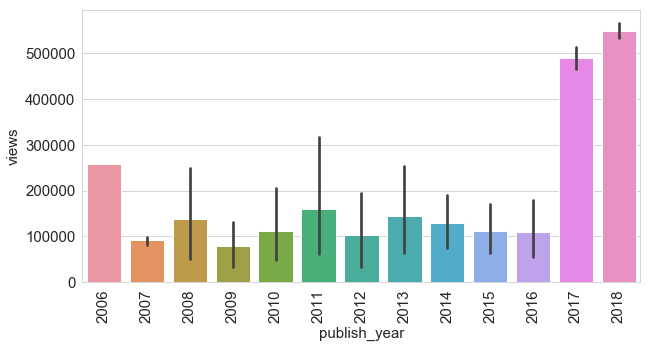

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(x='publish_year', y='views', data=tst).tick_params(axis='x', labelrotation=90)

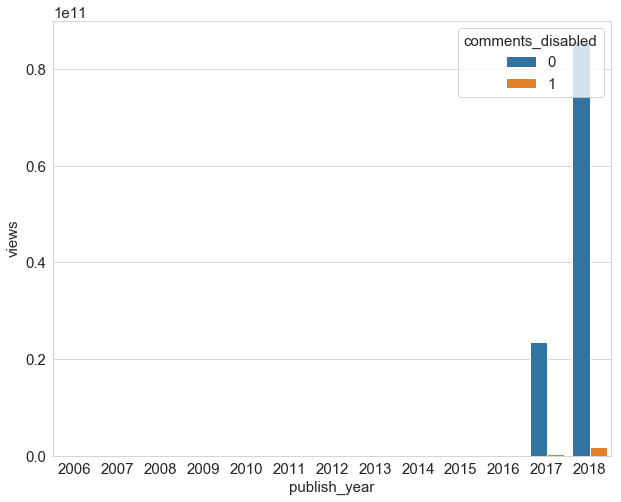

In [45]:
data = tst.groupby(['publish_year','comments_disabled']).sum().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x="publish_year", y="views", data=data, ci=None, hue='comments_disabled')

In [144]:
data = tst.groupby(['channel_title','region']).sum().head(3).reset_index()

plt.figure(figsize=(10,8))
sns.barplot(x="channel_title", y="views", data=data, ci=None, hue='region')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\matcg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-144-a3048dec7c0d>", line 3, in <module>
    sns.barplot(x="channel_title", y="views", data=data, ci=None, hue='region')
  File "C:\Users\matcg\Anaconda3\lib\site-packages\seaborn\categorical.py", line 3154, in barplot
    plotter.plot(ax, kwargs)
  File "C:\Users\matcg\Anaconda3\lib\site-packages\seaborn\categorical.py", line 1661, in plot
    self.draw_bars(ax, bar_kws)
  File "C:\Users\matcg\Anaconda3\lib\site-packages\seaborn\categorical.py", line 1646, in draw_bars
    label=hue_level, **kws)
  File "C:\Users\matcg\Anaconda3\lib\site-packages\matplotlib\__init__.py", line 1810, in inner
    return func(ax, *args, **kwargs)
  File "C:\Users\matcg\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 2341, in bar
    self.autoscale_view()
  File "C:\Users\matcg

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002751DB9D840> (for post_execute):


KeyboardInterrupt: 

In [156]:
data = tst.groupby(['region', 'channel_title']).head(3).sum().sort_values(by=['region','views'],ascending=False)
data

KeyboardInterrupt: 

In [163]:
tst.groupby(["region","channel_title"]).agg({"views": np.sum}).sort_values(by='views')

views
region channel_title               
RU     Alexander Redking        153
       Sport Life               163
FR     No Comment TV            284
MX     Videostendencias         302
FR     NavylittleMonster        365
...                             ...
CA     T-Series           363009442
GB     DrakeVEVO          364312023
       Ozuna              487997039
       NickyJamTV         496155291
IN     T-Series           524861717

[45367 rows x 1 columns]

In [164]:
tst.columns

Index(['video_id', 'title', 'channel_title', 'region', 'category_id',
       'category_name', 'publish_year', 'publish_month', 'views', 'dislikes',
       'comment_count', 'likes', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'max_trending_date', 'min_trending_date',
       'trending_count', 'max_trend_interval_days', 'min_trend_interval_days',
       'mean_trend_interval_days'],
      dtype='object')

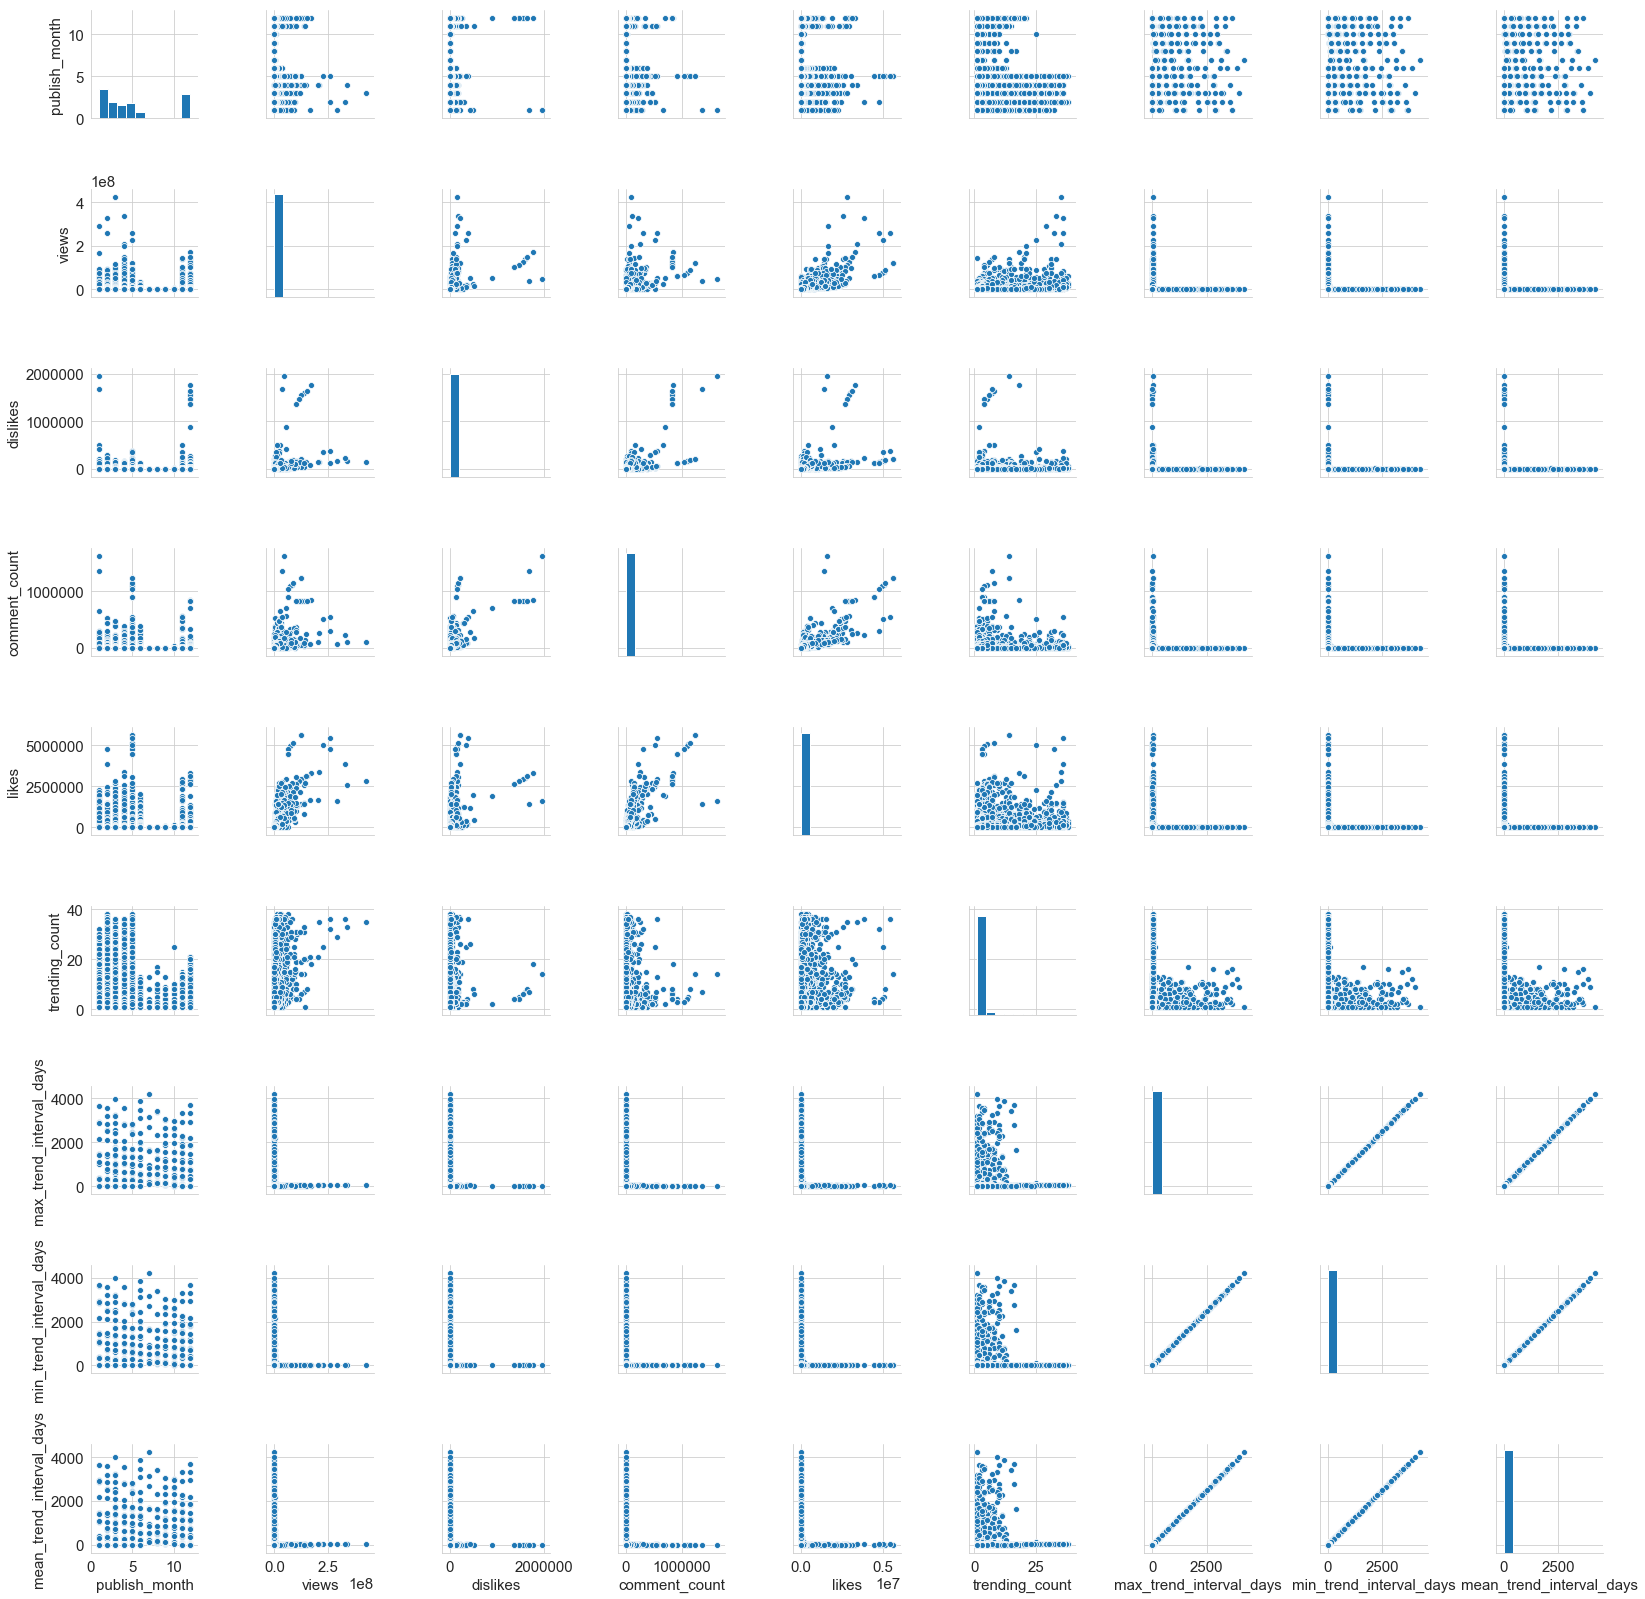

In [165]:
vars = ['publish_month', 'views', 'dislikes','comment_count','likes',
        'trending_count','max_trend_interval_days','min_trend_interval_days' ,'mean_trend_interval_days']

sns.pairplot(data=tst[vars], diag_kind="hist")